In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [3]:
x_data_1 = gdal.Open(r'E:\wenqu\trait_clip_update\site1b_d13c\d13c_site1b_5_25.tif').ReadAsArray()
x_data = x_data_1[x_data_1>0.05]
x_data.flatten

<function ndarray.flatten>

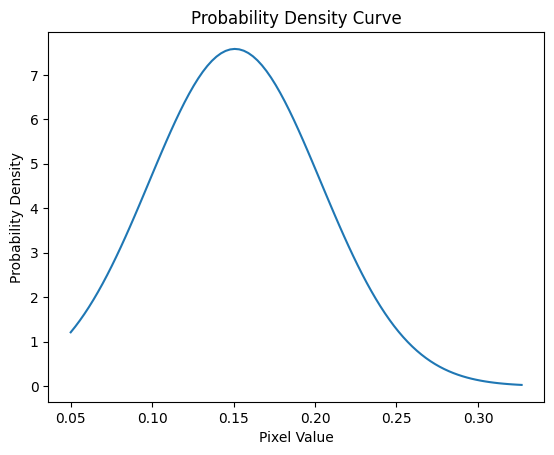

In [8]:
mean = np.mean(x_data)
sigma = np.std(x_data)

# Define Gaussian function
def gaussian(x, mean, sigma):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2/(2*sigma**2))

# Evaluate Gaussian function at a range of x values
x_range = np.linspace(np.min(x_data), np.max(x_data), 100)
y_range = gaussian(x_range, mean, sigma)

# Plot Gaussian curve
plt.plot(x_range, y_range)
plt.title('Probability Density Curve')
plt.xlabel('Pixel Value')
plt.ylabel('Probability Density')
plt.show()

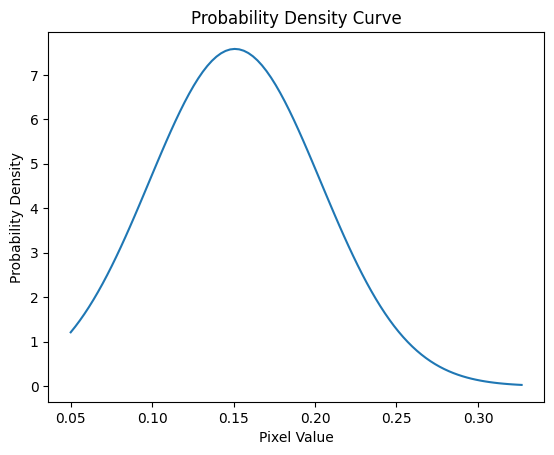

Maximum value of probability density curve: 7.581646231891871
Standard deviation of probability density curve: 2.644088474243706


In [9]:
# Calculate mean and standard deviation of image values
mean = np.mean(x_data)
sigma = np.std(x_data)

# Define Gaussian function
def gaussian(x, mean, sigma):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2/(2*sigma**2))

# Evaluate Gaussian function at a range of x values
x_range = np.linspace(np.min(x_data), np.max(x_data), 100)
y_range = gaussian(x_range, mean, sigma)

# Get maximum value and standard deviation of Gaussian curve
max_val = np.max(y_range)
std = np.std(y_range)

# Plot Gaussian curve
plt.plot(x_range, y_range)
plt.title('Probability Density Curve')
plt.xlabel('Pixel Value')
plt.ylabel('Probability Density')
plt.show()

print(f'Maximum value of probability density curve: {max_val}')
print(f'Standard deviation of probability density curve: {std}')

In [17]:
#plotting the histogram
# compute the histogram of a dataset, it returnns two arrays
# the number of values fallinng into the bin and the bin edges half-open, except last one
hist, bin_edges = np.histogram(x_data)
print(hist, bin_edges)
hist=hist/sum(hist)

[1777 2917 3972 4572 5377 3564 2528 1304  343   42] [0.05000605 0.08192016 0.11383427 0.14574838 0.17766249 0.2095766
 0.2414907  0.2734048  0.30531892 0.33723304 0.36914715]


In [18]:
hist

array([0.06732081, 0.11050917, 0.15047735, 0.17320806, 0.20370511,
       0.13502046, 0.09577209, 0.04940142, 0.01299439, 0.00159115])

In [19]:
bin_edges.shape

(11,)

In [20]:
n = len(hist)

x_hist=np.zeros((n),dtype=float) 
# middle value for each bin, has the same shape as y_hist
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2





# number of values falling into each bins - probability     
y_hist=hist

In [21]:
x_hist


array([0.0659631 , 0.09787722, 0.12979132, 0.16170543, 0.19361955,
       0.22553366, 0.25744775, 0.28936186, 0.32127598, 0.35319009])

In [22]:
#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gaus(X,C,X_mean,sigma):
    return C*exp(-(X-X_mean)**2/(2*sigma**2))

mean = sum(x_hist*y_hist)/sum(y_hist)                  
sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

In [23]:
print(max(y_hist),mean,sigma)

0.20370510683436885 0.1763772682825496 0.0038350484884732768


In [24]:
sum(x_hist*y_hist)

0.17637726828254957

In [25]:
#Gaussian least-square fitting process
# using nnon-linear least squares to fit a function
# model function; x data, y data; 
param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

C:\Users\15086\AppData\Local\Temp\ipykernel_30108\871226853.py:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


In [26]:
param_optimised.shape,param_covariance_matrix.shape

((3,), (3, 3))

In [27]:
param_optimised, param_optimised[0]

(array([0.1894515 , 0.17326363, 0.07062698]), 0.18945149633048203)

In [28]:
max(y_hist),mean,sigma

(0.20370510683436885, 0.1763772682825496, 0.0038350484884732768)

In [29]:
param_optimised[:2]

array([0.1894515 , 0.17326363])

C:\Users\15086\AppData\Local\Temp\ipykernel_30108\871226853.py:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


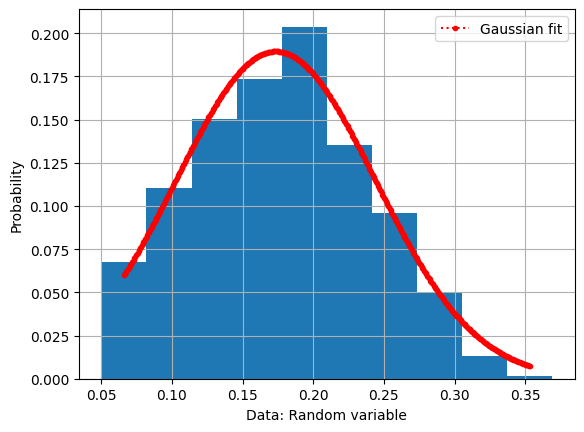

In [30]:
fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')
plt.legend()

#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights)

#setting the label,title and grid of the plot
plt.xlabel("Data: Random variable")
plt.ylabel("Probability")
plt.grid("on")
plt.show()

In [44]:
param_optimised[1]

0.008218518311645977

C:\Users\15086\AppData\Local\Temp\ipykernel_25092\871226853.py:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


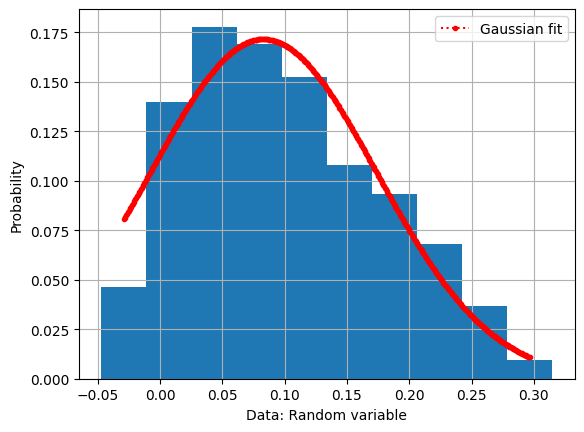

In [15]:
fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')
plt.legend()

#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights)

#setting the label,title and grid of the plot
plt.xlabel("Data: Random variable")
plt.ylabel("Probability")
plt.grid("on")
plt.show()

C:\Users\15086\AppData\Local\Temp\ipykernel_25092\871226853.py:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


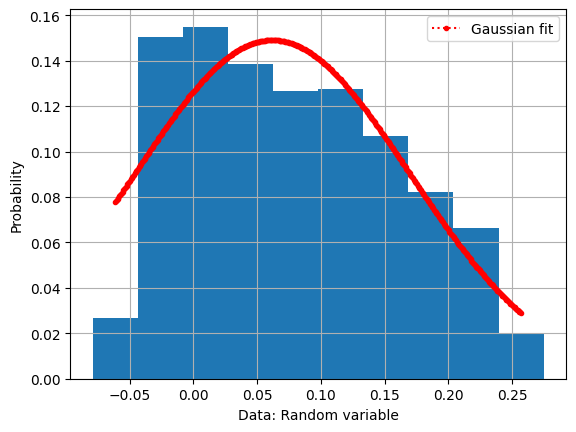

In [29]:
fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')
plt.legend()

#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights)

#setting the label,title and grid of the plot
plt.xlabel("Data: Random variable")
plt.ylabel("Probability")
plt.grid("on")
plt.show()

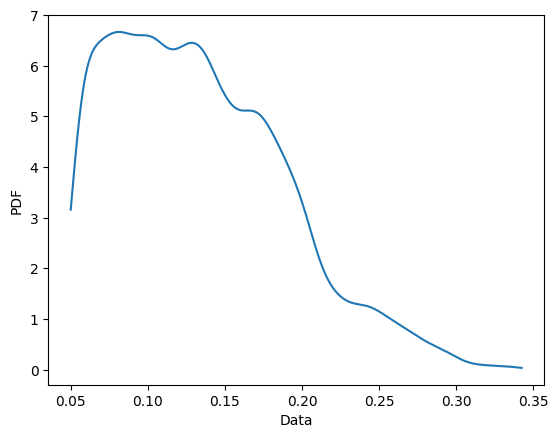

ymax:  6.6688798343338185
std:  0.055909075


In [5]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Generate some random data
# data = np.random.normal(size=100)

data = gdal.Open(r'F:\wenqu\Aviris\combine\trait_map\site1b_11_30.tif').ReadAsArray()
data = data[data>0.05]
data.flatten



# Calculate the PDF using KDE
kde = gaussian_kde(data)
x = np.linspace(np.min(data), np.max(data), 1000)
pdf = kde(x)

# Calculate the ymax and std
ymax = np.max(pdf)
std = np.std(data)

# Plot the PDF
plt.plot(x, pdf)
plt.xlabel('Data')
plt.ylabel('PDF')
plt.show()

print("ymax: ", ymax)
print("std: ", std)


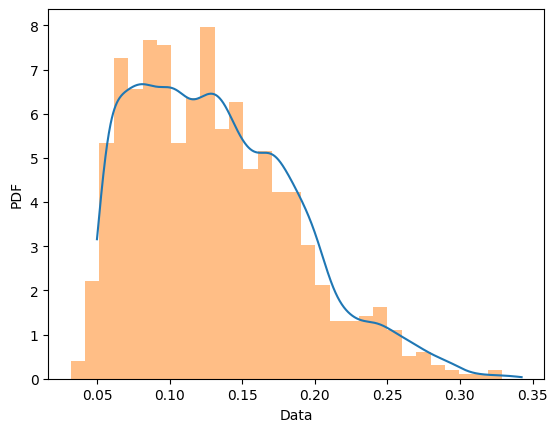

std of the new data:  0.05500446602284421


In [6]:
# Calculate the PDF using KDE
kde = gaussian_kde(data)
x = np.linspace(np.min(data), np.max(data), 1000)
pdf = kde(x)

# Generate new data from the PDF using KDE
new_data = kde.resample(1000)[0]

# Calculate the std of the new data
std_new = np.std(new_data)

# Plot the PDF and the new data
plt.plot(x, pdf)
plt.hist(new_data, bins=30, density=True, alpha=0.5)
plt.xlabel('Data')
plt.ylabel('PDF')
plt.show()

print("std of the new data: ", std_new)